<a href="https://www.kaggle.com/code/tolgatanrisever/car-sales-visualization?scriptVersionId=90851514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
# word cloud library
from wordcloud import WordCloud
import seaborn as sns
# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/car-sales/Car_sales.csv


In [2]:
# Load data that we will use.
carSales=pd.read_csv("/kaggle/input/car-sales/Car_sales.csv")

In [3]:
 carSales.head(8)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207


In [4]:
carSales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [5]:
carSales.Model.value_counts()

Neon          2
Integra       1
Cutlass       1
Sentra        1
Altima        1
             ..
Windstar      1
Expedition    1
Ranger        1
F-Series      1
S80           1
Name: Model, Length: 156, dtype: int64

In [6]:
carSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

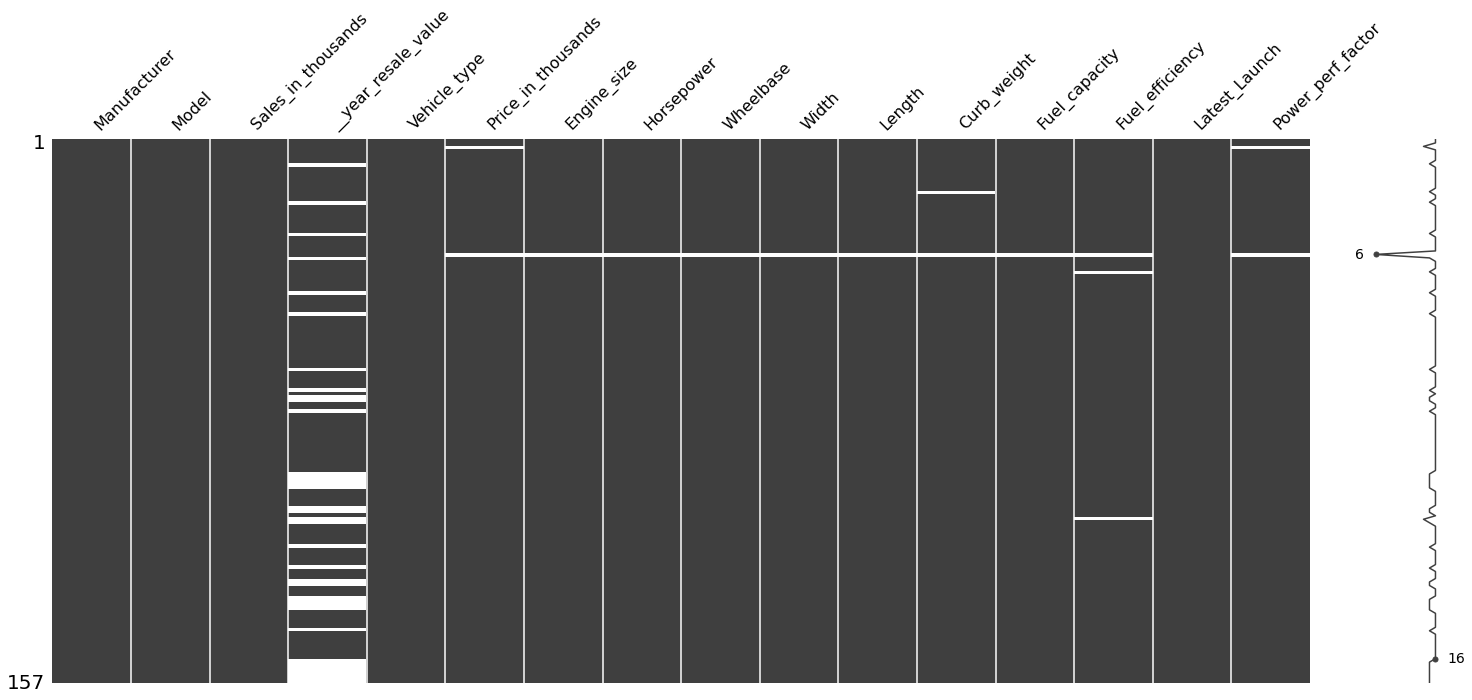

In [7]:
#import missingno library
import missingno as msno 
msno.matrix(carSales)
plt.show()

In [8]:
fig = px.scatter(carSales,
                 x='Power_perf_factor',
                 y='Price_in_thousands',
                 color='Model',
                
                 hover_data=['Price_in_thousands'],
                 title='Price vs. Model')
fig.update_traces(marker_size=5)
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(0, 153, 0,0.5)'})
fig.show()

In [9]:
carSales.Power_perf_factor =carSales.Power_perf_factor.replace(np.nan, 0, regex=True)
carSales.__year_resale_value =carSales.__year_resale_value.replace(np.nan, 0, regex=True)
carSales.Fuel_capacity=carSales.Fuel_capacity.replace(np.nan,0,regex=True)
# international_color = [str(each) for each in carSales.Model]



# cmap = plt.get_cmap('viridis')
# colors = cmap(np.linspace(0, 1, len(international_color)))
#print(colors)
# x = np.linspace(0, np.pi*2, 100)
# for i, (name, color) in enumerate(zip(international_color, colors), 1):
#     plt.plot(x, np.sin(x)/i, label=name, c=color)


In [10]:
trace1 =go.Scatter( x=carSales.Power_perf_factor,
                    y=carSales.Price_in_thousands,
                    mode ="markers",
                    
                    marker =dict(color=carSales.Power_perf_factor,size=(carSales.__year_resale_value/2),sizemin=4),
                    text= carSales.Model)

data = [trace1]
layout = dict(title = 'Power_perf_factor vs Price_in_thousands',
              xaxis= dict(title= 'Power_perf_factor',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price_in_thousands',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [11]:
trace=go.Histogram(
    x=carSales.Power_perf_factor)
    
layout = go.Layout(
    title={
        'text':'Power_perf_factor Histogram',
        'y':0.9,
        'x':0.5,
        'xanchor': 'left',
        'yanchor': 'top' 
        },          
    bargap=0.2,
    xaxis=dict(title='Power_perf_factor'),
    yaxis=dict( title='Count'),
)

fig = go.Figure(data=trace, layout=layout)
fig.update_traces(opacity=0.75)

iplot(fig)


In [12]:
fig = px.histogram(carSales,
                   x='Power_perf_factor',
                   marginal='box',
                   title='Distribution of Power Perform Factor',
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig=px.histogram(carSales,
                 x="__year_resale_value",
                 marginal="box",
                 title='Distribution of Year Resale Value',
    )
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig=px.histogram(carSales,
                 x="Sales_in_thousands",
                 marginal="box",
                 title='Distribution of Sales in Thousansds',
    )
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig=px.histogram(carSales,
                 x="Vehicle_type",
                
                 title='Distribution of Vehicle Type',
    )
fig.update_layout(bargap=0.1)
fig.show()


In [16]:

fig = px.histogram(carSales,
                   x='Price_in_thousands',
                   marginal='box',
                   title='Distribution of Year Resale Value')
fig.update_layout(bargap=0.1)
fig.show()


In [17]:
trace=go.Scatter(
    x=carSales.__year_resale_value,
    y=carSales.Price_in_thousands,
    mode='markers',
    marker =dict(color=carSales.Power_perf_factor,size=(carSales.Sales_in_thousands/10),sizemin=4),
    text=(carSales.Model))

data = [trace]
layout = dict(title = 'Year resale value vs Price_in_thousands',
              xaxis= dict(title= 'year_resale_value',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Price_in_thousands',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [18]:
fig = px.scatter(carSales,
                 x='Sales_in_thousands',
                 y='Price_in_thousands',
                 title='Sales_in_thousands vs. Price in Thousands')
fig.update_traces(marker_size=5)
fig.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

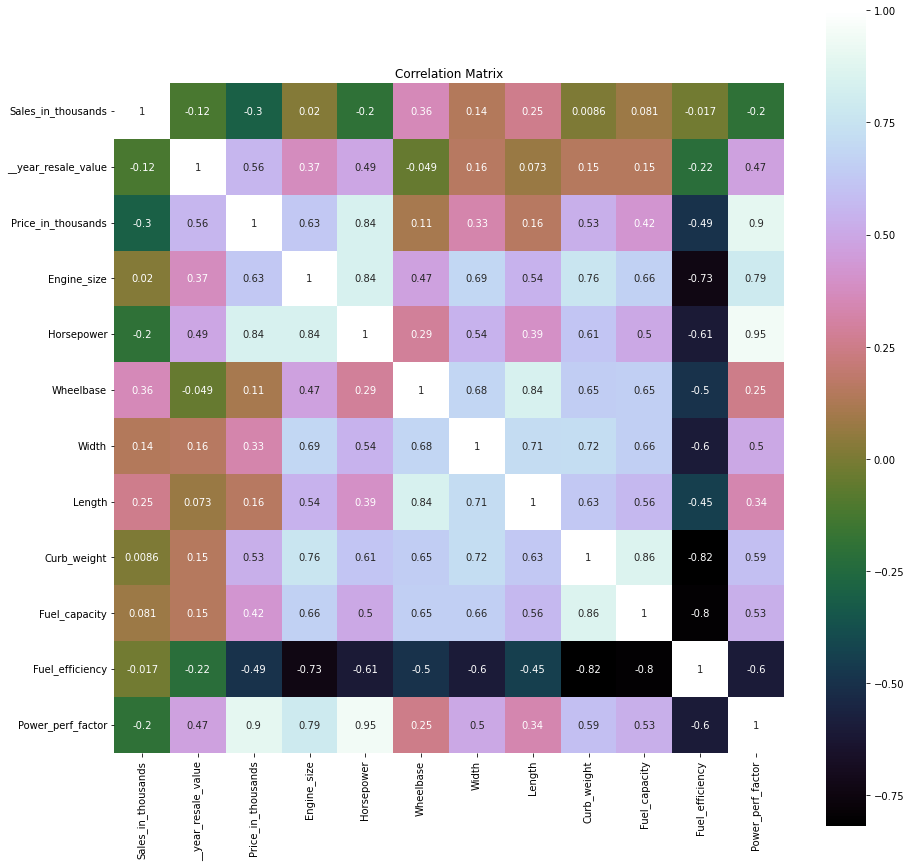

In [19]:
correlation = carSales.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [20]:
carBrand=list(carSales['Manufacturer'].unique())
carType=list(carSales['Vehicle_type'].unique())
salesThousand_ratio=[]
yearResaleValue_ratio=[]
priceThousand_ratio=[]

In [21]:

for i in carBrand:
    x=carSales[carSales['Manufacturer']==i]
    salesThousand_rate=sum(x.Sales_in_thousands)/len(x)
    salesThousand_ratio.append(salesThousand_rate)
datasalesTousands=pd.DataFrame({"car_brand":carBrand,"salesThousand_ratio":salesThousand_ratio})
new_index=(datasalesTousands['salesThousand_ratio'].sort_values(ascending=False)).index.values
shorted_salesThousandsData=datasalesTousands.reindex(new_index)




In [22]:

for i in carBrand:
    x=carSales[carSales['Manufacturer']==i]
    yearResaleValue_rate=sum(x.__year_resale_value)/len(x)
    yearResaleValue_ratio.append(yearResaleValue_rate)
datayearResaleValue=pd.DataFrame({"car_brand":carBrand,"yearResaleValue_ratio":yearResaleValue_ratio})
new_index=(datayearResaleValue['yearResaleValue_ratio'].sort_values(ascending=False)).index.values
shorted_yearResaleValueData=datayearResaleValue.reindex(new_index)

In [23]:


for i in carBrand:
    x=carSales[carSales['Manufacturer']==i]
    priceThousand_rate=sum(x.Price_in_thousands)/len(x)
    priceThousand_ratio.append(priceThousand_rate)
datapriceThousand=pd.DataFrame({"car_brand":carBrand,"priceThousand_ratio":priceThousand_ratio})
new_index=(datapriceThousand['priceThousand_ratio'].sort_values(ascending=False)).index.values
shorted_priceThousandData=datapriceThousand.reindex(new_index)

In [24]:
priceThousand_ratioType=[]
for i in carType:
    x=carSales[carSales['Vehicle_type']==i]
    x.Price_in_thousands=x.Price_in_thousands.replace(np.nan,0)
    priceThousand_rate=sum(x.Price_in_thousands)/len(x)
    priceThousand_ratioType.append(priceThousand_rate)
datapriceThousandcartype=pd.DataFrame({"car_type":carType,"priceThousand_ratio":priceThousand_ratioType})
    

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
yearResaleValue_ratioType=[]
for i in carType:
    x=carSales[carSales['Vehicle_type']==i]
    x.__year_resale_value=x.__year_resale_value.replace(np.nan,0)
    yearResaleValue_rate=sum(x.__year_resale_value)/len(x)
    yearResaleValue_ratioType.append(yearResaleValue_rate)
datayearResaleValuecartype=pd.DataFrame({"car_type":carType,"yearResaleValue_ratio":yearResaleValue_ratioType})

In [26]:
salesThousand_ratioType=[]
for i in carType:
    x=carSales[carSales['Vehicle_type']==i]
    
    salesThousand_rate=sum(x.Sales_in_thousands)/len(x)
    salesThousand_ratioType.append(salesThousand_rate)
datasalesThousandcartype=pd.DataFrame({"car_type":carType,"salesThousand_ratio":salesThousand_ratioType})


In [27]:
#datasalesThousandcartype

In [28]:
#datayearResaleValuecartype

In [29]:
#datapriceThousandcartype

In [30]:
#shorted_salesThousandsData

In [31]:
#shorted_yearResaleValueData

In [32]:
#shorted_priceThousandData

In [33]:
trace=go.Bar(
    x=shorted_salesThousandsData.car_brand,
    y=shorted_salesThousandsData.salesThousand_ratio,
    type='bar',
    marker=dict(color=shorted_salesThousandsData.salesThousand_ratio,line=dict(color='rgb(0,0,0)',width=1.5)),
    text=shorted_salesThousandsData.car_brand
    )
data=[trace]
layout=dict(title="Car brand sales thousands ratio",
           xaxis=dict(title="car_brand"),
           yaxis=dict(title="salesThousand_ratio"),
           barmode='relative')#If we don't, they stand side by side.



# fig = dict(data = data, layout = layout)
fig=go.Figure(data=data,layout=layout)
# iplot(fig)
fig.update_layout(barmode='relative',
    title={
        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(128, 0, 0,0.5)'})


In [34]:
trace=go.Scatter(
      x=shorted_salesThousandsData.car_brand,
      y=shorted_salesThousandsData.salesThousand_ratio,
      
      mode='markers',
      marker=dict(color=shorted_salesThousandsData.salesThousand_ratio,size=(shorted_salesThousandsData.salesThousand_ratio/4),sizemin=4 ),
      text=shorted_salesThousandsData.car_brand) 

layout=dict(title="Car brand sales thousands ratio",
             xaxis=dict(title="car_brand"),
             yaxis=dict(title="salesThousand"))

fig = dict(data = trace, layout = layout)
iplot(fig)


In [35]:
fig = px.bar(shorted_yearResaleValueData,
                 x='car_brand',
                 y='yearResaleValue_ratio',
                 title='Car brand year resale ratio',
                 color="car_brand")
fig.update_traces()
fig.show()



In [36]:
fig = px.scatter(shorted_yearResaleValueData,
                 x='car_brand',
                 y='yearResaleValue_ratio',
                 title='Car brand year resale ratio',
                 color="car_brand",
                 size='yearResaleValue_ratio')
fig.update_traces()
fig.show()

In [37]:
fig = px.bar(shorted_priceThousandData,
                 x='car_brand',
                 y='priceThousand_ratio',
                 title='Car brand price thousand ratio',
                 color="car_brand")
fig.update_traces()
fig.show()



In [38]:
fig = px.bar(datayearResaleValuecartype,
                 x='car_type',
                 y='yearResaleValue_ratio',
                 title="Car types year resale ratio",
                 color="car_type")
fig.update_traces()
fig.show()

In [39]:
fig = px.bar(datasalesThousandcartype,
                 x='car_type',
                 y='salesThousand_ratio',
                 title="Car types price thousand ratio",
                 color="car_type")
fig.update_traces()
fig.show()

In [40]:
trace=go.Bar(
    x=datapriceThousandcartype.car_type,
    y=datapriceThousandcartype.priceThousand_ratio,
    type='bar',
    marker=dict(color=datapriceThousandcartype.priceThousand_ratio,line=dict(color='rgb(0,0,0)',width=1.5)),
    text=datapriceThousandcartype.car_type
    )
data=[trace]
layout=dict(title="Car types price thousand ratio",
           xaxis=dict(title="car_type"),
           yaxis=dict(title="priceThousand_ratio"),
           barmode='relative')#If we don't, they stand side by side.



# fig = dict(data = data, layout = layout)
fig=go.Figure(data=data,layout=layout)
# iplot(fig)
fig.update_layout(barmode='relative',
    title={
        
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font_color':'rgba(128, 0, 0,0.5)'})

In [41]:
# data preparation
# df2016 = timesData[timesData.year == 2016].iloc[:20,:]
# num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
# international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': carSales.Engine_size,
        'x': carSales.Horsepower,
        'mode': 'markers',
        'marker': {
            'color':carSales.Wheelbase,
            'size':(carSales.Power_perf_factor/6),
            'showscale': True,
            'sizemin':4,
            'sizemode':'diameter',
            'symbol':'diamond-open'
           
        },
        "text" :  carSales.Model,
        
    }
]



layout={
    'xaxis':{'title':'Horsepower'},
    'yaxis':{'title':'Engine_size'},
    
   
};

fig=go.Figure(data=data,layout=layout)

fig.update_layout(
    title={
        'text': "Vehicle engin size  vs horsepower  with .Power_perf_factor(size) and .Wheelbase (color) ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
# iplot(fig)
# iplot(data)

In [42]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=carSales.Sales_in_thousands,
    y=carSales.__year_resale_value,
    z=carSales.Price_in_thousands,
    mode='markers',
    text=carSales.Model,
    marker=dict(
        size=carSales.Fuel_capacity,
        color=carSales.index,
        colorscale='Viridis',   # choose a colorscale
                        # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    
#                     xaxis_title='X AXIS TITLE',
#                     yaxis_title='Y AXIS TITLE',
#                     zaxis_title='Z AXIS TITLE'),
#                     width=700,
#                     margin=dict(r=20, b=10, l=10, t=10),
#                    
    
                 
                     xaxis = dict(
                         title="Sales_in_thousands",
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        title="year_resale_value",
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        title="Price_in_thousands",
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",)
                    
                 
                 ),
                 title={
                        'text':'Vehicle Sales_in_thousands, year_resale_value, Price_in_thousands rates size(Fuel CApacity)',
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top' })
                    
iplot(fig)

In [43]:
carSales.Engine_size=carSales.Engine_size.replace(np.nan,0,regex=True)

fig=px.scatter_3d(carSales,
                  x='Fuel_capacity',
                  y='Fuel_efficiency',
                  z='Horsepower',
                  color='Model',
                  size='Engine_size',
                  
                  
)

fig.update_layout(scene = dict(
                    
#                     xaxis_title='X AXIS TITLE',
#                     yaxis_title='Y AXIS TITLE',
#                     zaxis_title='Z AXIS TITLE'),
#                     width=700,
#                     margin=dict(r=20, b=10, l=10, t=10),
#                    
    
                 
                     xaxis = dict(
                         title="Sales_in_thousands",
                         backgroundcolor="rgb(200, 200, 230)",
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        title="year_resale_value",
                        backgroundcolor="rgb(230, 200,230)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        title="Price_in_thousands",
                        backgroundcolor="rgb(230, 230,200)",
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",)
                    
                 
                 ),
                 title={
                        'text':'Vehicle Sales_in_thousands, year_resale_value, Price_in_thousands rates size(Fuel CApacity)',
                        'y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top' })
                    

fig.show()